In [137]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [138]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime as dt,timedelta

# Reflect Tables into SQLAlchemy ORM

In [139]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [140]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [141]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [142]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [143]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [144]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [145]:
# Find the most recent date in the data set.

# session.query(measurement.date).order_by(measurement.date.desc()).first()

date_last = session.query(measurement.date).order_by(measurement.date.desc()).first()

In [200]:
print(date_last[0])

2017-08-23


In [147]:
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_year_date = dt.strptime(latest_date[0], "%Y-%m-%d") # string to date
last_year_date = last_year_date - timedelta(days=365) # date - days
last_year_date = last_year_date.strftime("%Y-%m-%d") # date to string

In [148]:
print(last_year_date)

2016-08-23


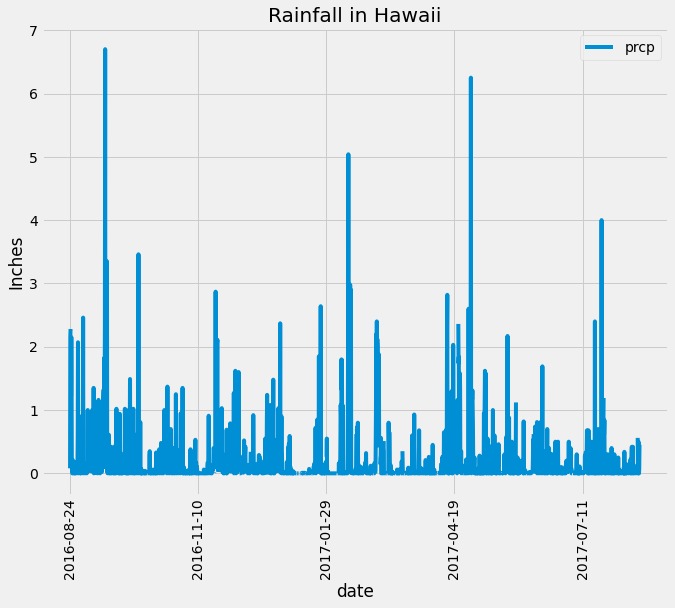

In [151]:

# Perform a query to retrieve the data and precipitation scores
precip = session.query(measurement.date,measurement.prcp).filter(measurement.date > last_year_date).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precip, columns=['date', 'prcp'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
# l = {"2016-08-23","2017-08-23"}
# df.plot(kind="bar",figsize=(20,3),title = "Rainfall in Hawaii", xticks=l);
df.plot(rot=90, figsize = (10,8), title = "Rainfall in Hawaii", ylabel = "Inches");

In [152]:
# Use Pandas to calculate the summary statistics for the precipitation data

df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [153]:
# Design a query to calculate the total number stations in the dataset

from sqlalchemy.sql import func

num_station = session.query(station.id).count()
print(num_station)


9


In [205]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [160]:
# * Which station id has the highest number of observations?

most_active_station = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()

print(most_active_station[0])

('USC00519281', 2772)


In [174]:
#  * Using the most active station id, calculate the lowest, highest, and average temperature.

#  * Hint: You will need to use a function such as `func.min`, `func.max`, `func.avg`, and `func.count` in your queries.

third = session.query(func.avg(measurement.tobs),func.min(measurement.tobs),func.max(measurement.tobs)).\
filter(measurement.station == most_active_station[0][0])

In [180]:
type(third[0][0])

float

In [189]:
print(f"average temperature: {round(third[0][0],1)}")

average temperature: 71.7


In [184]:
print(f"minimum temperature: {third[0][1]}")

minimum temperature: 54.0


In [185]:
print(f"maximum temperature: {third[0][2]}")

maximum temperature: 85.0


In [190]:

# Design a * Design a query to retrieve the last 12 months of temperature observation data (TOBS).

variable = session.query(measurement.date,measurement.tobs).\
filter(measurement.station == most_active_station[0][0]).\
filter(measurement.date >= last_year_date).all()

In [191]:
print(variable[0])

('2016-08-23', 77.0)


In [192]:
df = pd.DataFrame(variable)

In [198]:
df.columns = ['Date','tobs']

In [199]:
df

,Date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


<AxesSubplot:ylabel='Frequency'>

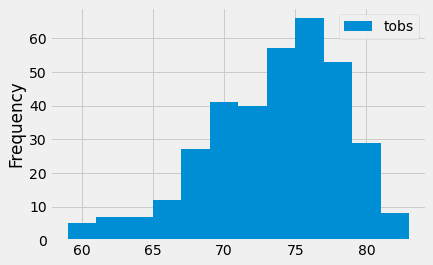

In [203]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

df.plot(kind="hist",bins=12) #(rot=90, figsize = (10,8), title = "Rainfall in Hawaii", ylabel = "Inches");
plt.title("Test")
plt.xaxis("Test")

In [73]:
df = pd.read_sql('station',con=engine)
df = pd.read_sql('measurement',con=engine)
df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


# Close session

In [ ]:
# Close Session
session.close()